# **Prediction of anaerobic digestion of selenium rich water using polynomial regression**

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Importing the dataset

In [2]:
dataset = pd.read_csv('reactor_data_anerobic.csv')

In [3]:
dataset.describe()

,CONDITIONS(mM SeO^4 2-)(ANAEROBIC GRANULAR SLUDGE),M0 (mL/g COD),Rm(mL/g COD-d),Lamda(d),Tm(d),R2
count,47.000000,43.000000,43.000000,43.000000,38.000000,34.000000
mean,1.200000,560.353023,39.632093,16.195581,42.115711,0.921035
std,0.685565,185.769011,24.175330,7.963296,16.141559,0.047028
min,0.050000,231.910000,10.000000,6.410000,11.790000,0.776000
25%,0.625000,408.850000,15.920000,9.250000,34.460000,0.900625
50%,1.200000,587.340000,35.450000,16.270000,46.105000,0.920000
75%,1.775000,722.505000,58.570000,22.445000,56.347500,0.950000
max,2.350000,800.000000,85.050000,35.340000,78.350000,0.990000


## Data Preprocessing

In [4]:
# Remove rows with missing values in key columns
dataset_cleaned = dataset.dropna(subset=['CONDITIONS(mM SeO^4 2-)(ANAEROBIC GRANULAR SLUDGE)', 'Lamda(d)'])

# Prepare features and target variable
X = dataset_cleaned['CONDITIONS(mM SeO^4 2-)(ANAEROBIC GRANULAR SLUDGE)'].values
y = dataset_cleaned['Lamda(d)'].values

# Reshape data
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [5]:
print(dataset)

    CONDITIONS(mM SeO^4 2-)(ANAEROBIC GRANULAR SLUDGE)  M0 (mL/g COD)  \
0                                                0.05          232.11   
1                                                0.10          231.91   
2                                                0.15          239.05   
3                                                0.20          252.22   
4                                                0.25          275.14   
5                                                0.30          291.56   
6                                                0.35          309.60   
7                                                0.40          327.65   
8                                                0.45          345.69   
9                                                0.50          363.74   
10                                               0.55          381.78   
11                                               0.60             NaN   
12                                               0.

## Splitting the dataset into the Training set and Test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Polynomial Regression with different degrees

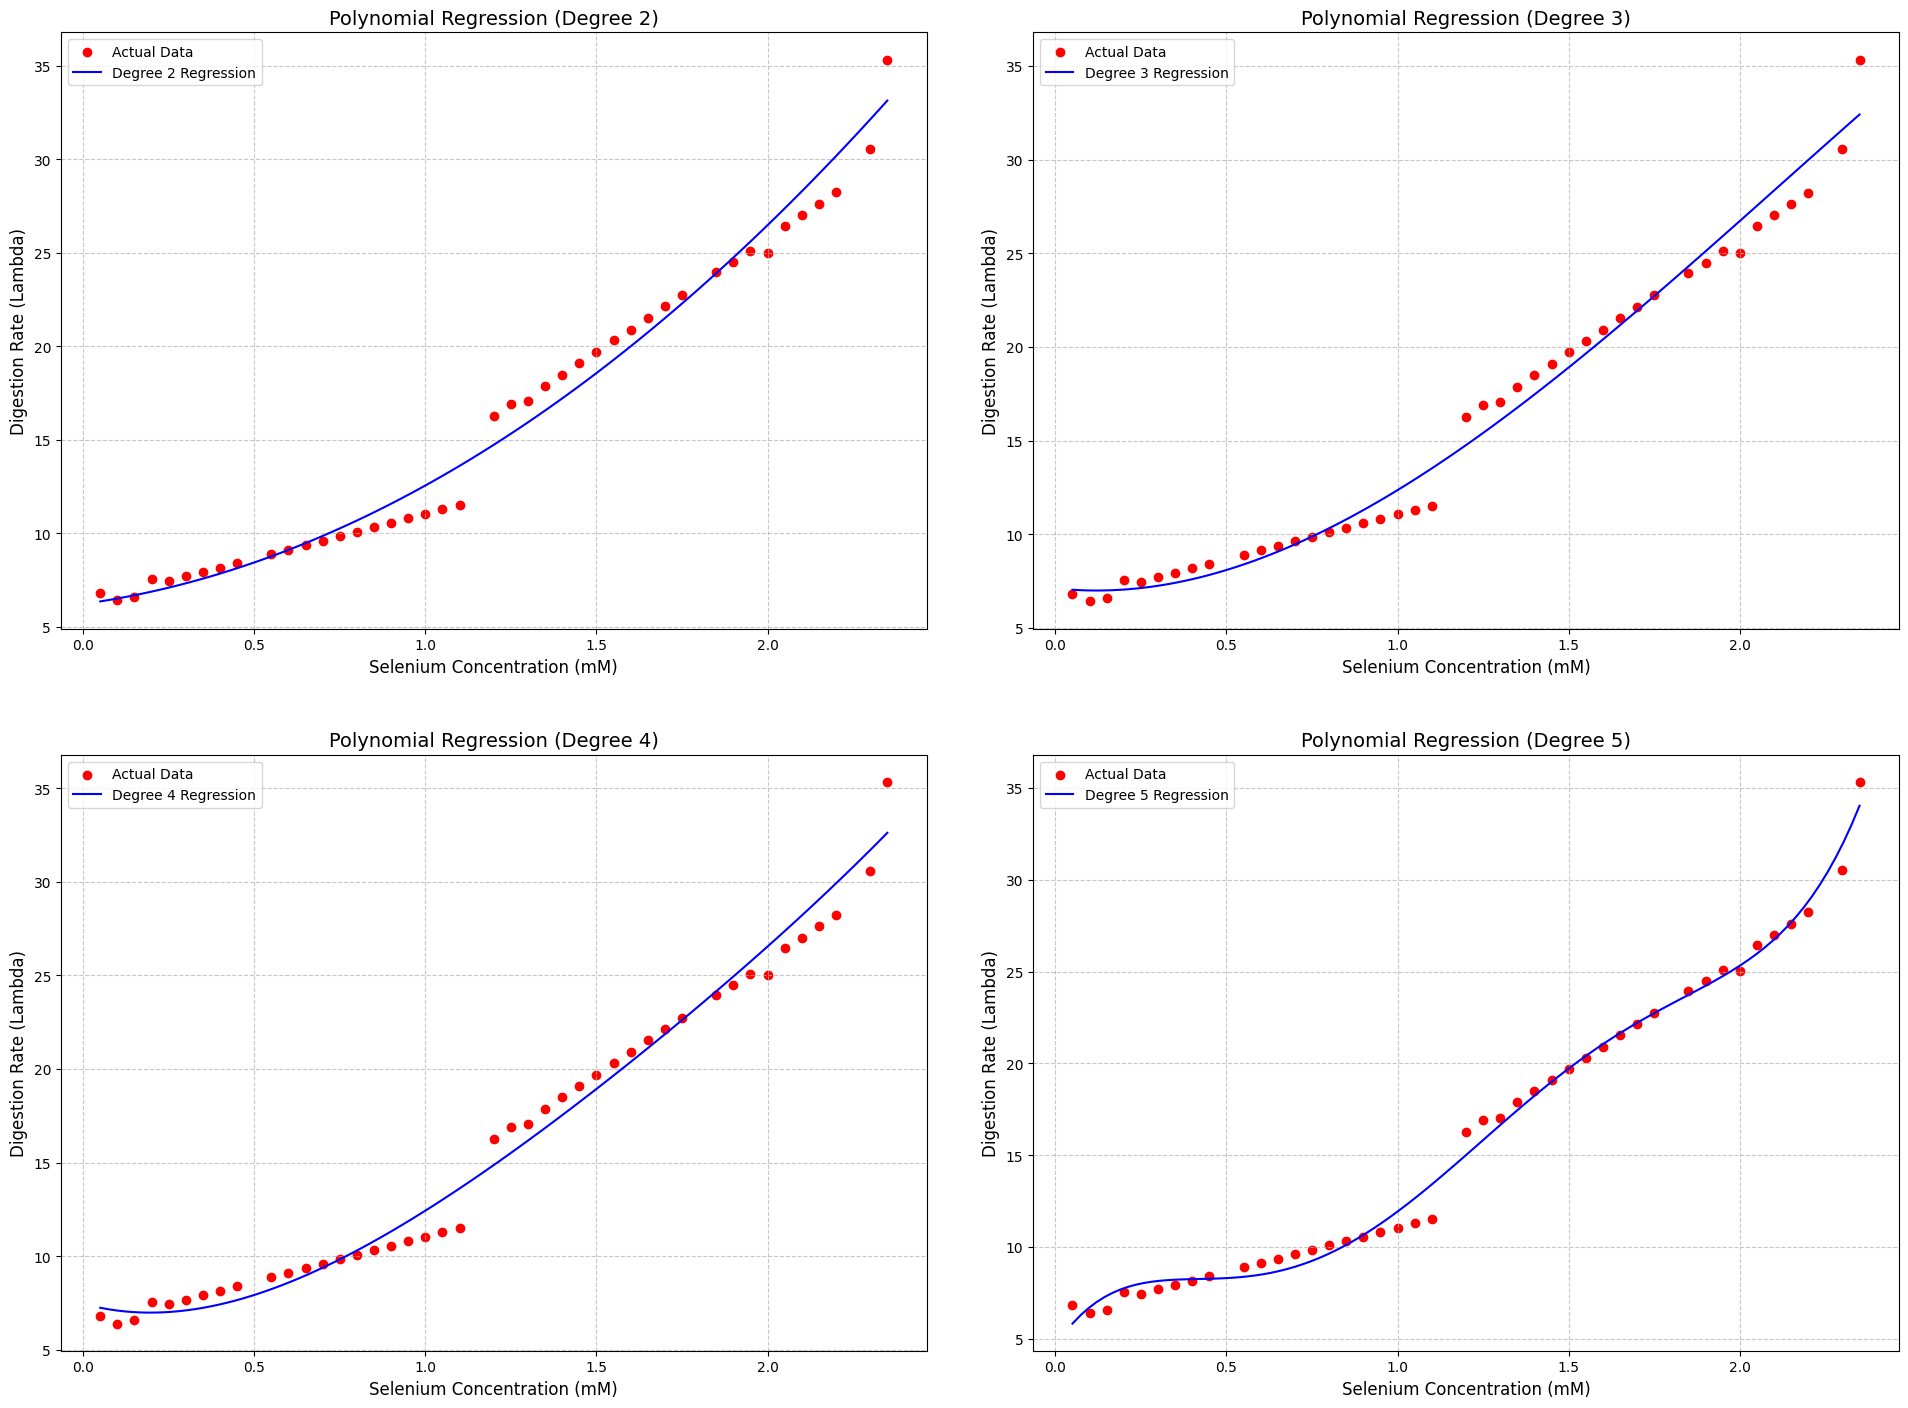

Model Performances:
Degree 2:
  Mean Squared Error: 1.0288
  R-squared Score: 0.9825

Degree 3:
  Mean Squared Error: 1.0690
  R-squared Score: 0.9818

Degree 4:
  Mean Squared Error: 0.9052
  R-squared Score: 0.9846

Degree 5:
  Mean Squared Error: 0.1611
  R-squared Score: 0.9973

Best Polynomial Degree: 5


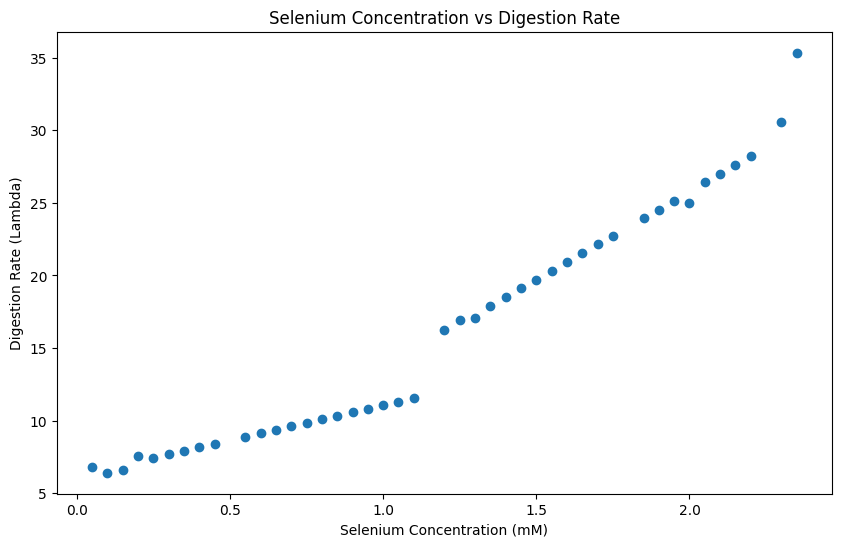

In [8]:
degrees = [2, 3, 4, 5]
plt.figure(figsize=(20, 15))

# Store model performances
model_performances = []

for i, degree in enumerate(degrees, 1):
    # Polynomial Features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Fit Polynomial Regression
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)

    # Predictions
    y_pred = poly_reg.predict(X_poly_test)

    # Performance Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store performance
    model_performances.append({
        'Degree': degree,
        'MSE': mse,
        'R2': r2
    })

    # Plotting
    plt.subplot(2, 2, i)

    # Create smooth X grid for prediction
    X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_grid_poly = poly_features.transform(X_grid)

    # Scatter plot of actual data
    plt.scatter(X, y, color='red', label='Actual Data')

    # Polynomial regression line
    plt.plot(X_grid, poly_reg.predict(X_grid_poly), color='blue',
             label=f'Degree {degree} Regression')

    plt.title(f'Polynomial Regression (Degree {degree})', fontsize=14)
    plt.xlabel('Selenium Concentration (mM)', fontsize=12)
    plt.ylabel('Digestion Rate (Lambda)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    # Adjust layout with more space
plt.tight_layout(pad=4.0)
plt.show()

# Print model performances
print("Model Performances:")
for performance in model_performances:
    print(f"Degree {performance['Degree']}:")
    print(f"  Mean Squared Error: {performance['MSE']:.4f}")
    print(f"  R-squared Score: {performance['R2']:.4f}\n")

# Cross-validation for the best degree
best_degree = min(model_performances, key=lambda x: x['MSE'])['Degree']
print(f"Best Polynomial Degree: {best_degree}")

# Prepare final model with best degree
poly_features_best = PolynomialFeatures(degree=best_degree)
X_poly = poly_features_best.fit_transform(X)
final_model = LinearRegression()
final_model.fit(X_poly, y)

# Correlation analysis
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.title('Selenium Concentration vs Digestion Rate')
plt.xlabel('Selenium Concentration (mM)')
plt.ylabel('Digestion Rate (Lambda)')
plt.show()


## Predicting the Test set results

In [9]:
def predict_digestion_rate(selenium_concentration):
    """
    Predict digestion rate for a given selenium concentration
    """
    return final_model.predict(poly_features_best.transform([[selenium_concentration]]))[0][0]

# Example predictions
test_concentrations = [0.5, 1.0, 1.5, 2.0]
print("\nExample Predictions:")
for conc in test_concentrations:
    print(f"Selenium Concentration {conc} mM: Digestion Rate = {predict_digestion_rate(conc):.4f}")



Example Predictions:
Selenium Concentration 0.5 mM: Digestion Rate = 8.3182
Selenium Concentration 1.0 mM: Digestion Rate = 12.0192
Selenium Concentration 1.5 mM: Digestion Rate = 19.7574
Selenium Concentration 2.0 mM: Digestion Rate = 25.3726


## Visualize final prediction model

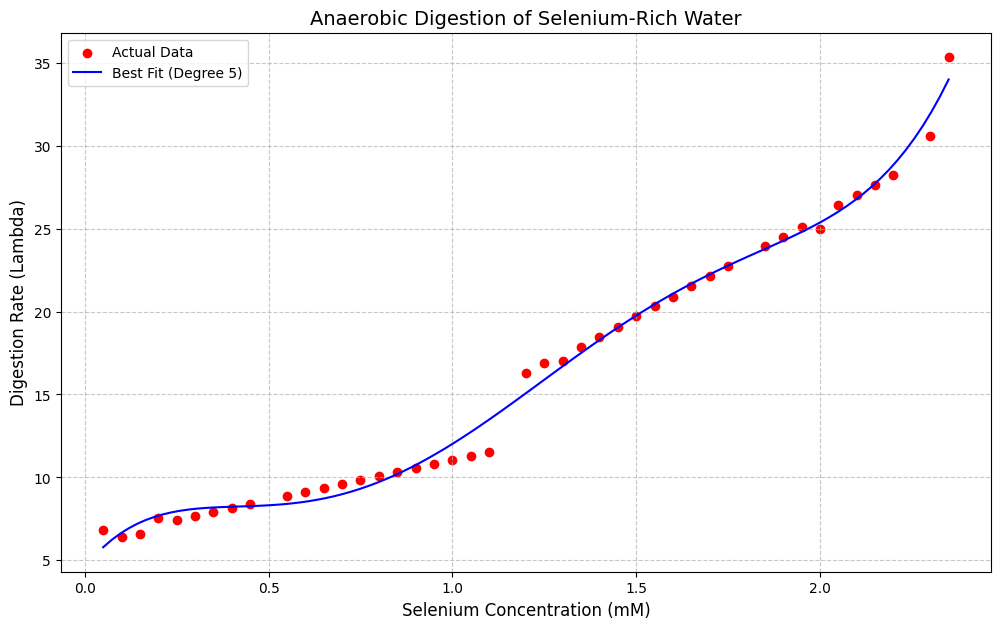


Dataset Insights:
Total number of data points: 43
Selenium Concentration Range: 0.05 - 2.35 mM
Digestion Rate Range: 6.41 - 35.34


In [10]:
plt.figure(figsize=(12, 7))
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_range, final_model.predict(poly_features_best.transform(X_range)),
         color='blue', label=f'Best Fit (Degree {best_degree})')
plt.title('Anaerobic Digestion of Selenium-Rich Water', fontsize=14)
plt.xlabel('Selenium Concentration (mM)', fontsize=12)
plt.ylabel('Digestion Rate (Lambda)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Additional insights
print("\nDataset Insights:")
print(f"Total number of data points: {len(X)}")
print(f"Selenium Concentration Range: {X.min():.2f} - {X.max():.2f} mM")
print(f"Digestion Rate Range: {y.min():.2f} - {y.max():.2f}")